# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?

Below I've set up an outline of a notebook for this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [6]:
import pandas as pd
import numpy as np

feature_names = ["BI_RADS", "age", "shape", "margin", "density", "severity"]

data = pd.read_csv("C:/Users/amontagut/Desktop/Python/MLCourse/mammographic_masses.data.txt", sep=",", na_values=['?'],
                  names = feature_names)

#Severity is a measure of malignancy. 0 = benign, 1 = malignant








,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [45]:
len(data[data.columns[1]].isna()==True)

961

There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

In [43]:
#Iterate through all columns and return the number of affected rows

for x in range(len(data.columns)):
    print(data.columns[x], "has this many NA's: ", len(data[data[data.columns[x]].isna()==True]))

    
    


BI_RADS has this many NA's:  2
age has this many NA's:  5
shape has this many NA's:  31
margin has this many NA's:  48
density has this many NA's:  76
severity has this many NA's:  0


If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [47]:
#The instructor did drop the NA's, so I will too

data = data.dropna()

data.describe()

,BI_RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [55]:
X_data = np.array(data[["age", "shape", "margin", "density"]])

y_data = np.array(data["severity"])

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data_fitted = scaler.fit_transform(X_data)

## Decision Trees

Before moving to K-Fold cross validation and random forests, start by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_fitted, y_data, train_size=0.75)



Now create a DecisionTreeClassifier and fit it to your training data.

In [65]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Display the resulting decision tree.

[Text(131.040087890625, 211.7178947368421, 'X[2] <= -0.838\ngini = 0.498\nsamples = 622\nvalue = [330, 292]'),
 Text(56.57127403846154, 200.2736842105263, 'X[0] <= 0.595\ngini = 0.219\nsamples = 248\nvalue = [217, 31]'),
 Text(21.931009615384614, 188.82947368421054, 'X[0] <= -0.974\ngini = 0.168\nsamples = 216\nvalue = [196, 20]'),
 Text(4.292307692307692, 177.38526315789474, 'X[0] <= -1.52\ngini = 0.051\nsamples = 77\nvalue = [75, 2]'),
 Text(2.146153846153846, 165.94105263157894, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(6.438461538461539, 165.94105263157894, 'X[0] <= -1.383\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(4.292307692307692, 154.49684210526317, 'X[1] <= -1.032\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(2.146153846153846, 143.05263157894737, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(6.438461538461539, 143.05263157894737, 'X[3] <= -1.185\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(4.292307692307692, 131.60842105263157, 'gini = 0.

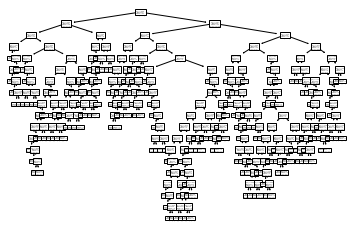

In [68]:
from sklearn import tree

tree.plot_tree(decision_tree.fit(X_train, y_train))

Measure the accuracy of the resulting decision tree model using your test data.

In [69]:
from sklearn.metrics import accuracy_score

decision_tree_output = decision_tree.predict(X_test)




In [70]:
decision_tree_accuracy = accuracy_score(decision_tree_output, y_test)

print(decision_tree_accuracy)

0.7307692307692307


Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). Hint: use model_selection.cross_val_score

In [73]:
from sklearn.model_selection import cross_val_score


decision_tree_cross_val_score = cross_val_score(decision_tree, X_data_fitted, y_data, cv=10)

print(decision_tree_cross_val_score.mean())

0.7397590361445783


Now try a RandomForestClassifier instead. Does it perform better?

In [75]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()

randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
randomForest_output = randomForest.predict(X_test)

randomForest_accuracy = accuracy_score(randomForest_output, y_test)
print(randomForest_accuracy)

#Now for cross-validation

rf_cross_val_score = cross_val_score(randomForest, X_data_fitted, y_data, cv=10)

print(rf_cross_val_score.mean())

0.7403846153846154
0.76144578313253


## SVM

Next try using svm.SVC with a linear kernel. How does it compare to the decision tree?

In [79]:
from sklearn.svm import SVC

svc_classifier = SVC()

svc_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
svc_output = svc_classifier.predict(X_test)

In [81]:
svc_accuracy = accuracy_score(svc_output, y_test)

print(svc_accuracy) 

0.8461538461538461


Damn, that's pretty good, but it looks like it's because I forgot to specify a linear kernel! sklearn method defaults to an RBF one. Let's see how a linear kernel fares:

In [82]:
svc_classifier_linear = SVC(kernel="linear")

svc_classifier_linear.fit(X_train, y_train)

svc_linear_output = svc_classifier_linear.predict(X_test)

svc_accuracy_LINEAR = accuracy_score(svc_linear_output, y_test)

print(svc_accuracy_LINEAR)

0.8461538461538461


Trying multiple kernels


In [110]:
kernels = ["rbf", "linear", "poly", "sigmoid"]

accuracy_scores =[]

for x in range(len(kernels)):
        classifier = SVC(kernel=kernels[x])
        classifier.fit(X_train, y_train)
        classifier_output = classifier.predict(X_test)
        classifier_accuracy = accuracy_score(classifier_output, y_test)
        accuracy_scores.append(classifier_accuracy)
        
#Combine both together

accuracy_scores = pd.DataFrame(kernels, accuracy_scores)

accuracy_scores["accuracy score"] = accuracy_scores.index

accuracy_scores.index=[1,2,3,4]

#accuracy_scores.rename(columns={0: "Kernel"})

accuracy_scores

        
        


,0,accuracy score
1,rbf,0.846154
2,linear,0.846154
3,poly,0.822115
4,sigmoid,0.769231


## KNN
How about K-Nearest-Neighbors? Hint: use neighbors.KNeighborsClassifier - it's a lot easier than implementing KNN from scratch like we did earlier in the course. Start with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [111]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=10)

KNN_classifier.fit(X_train, y_train)
KNN_output = KNN_classifier.predict(X_test)

KNN_accuracy = accuracy_score(KNN_output, y_test)

print(KNN_accuracy)





0.7980769230769231


Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [136]:
KNN_accuracies = []

for k in np.arange(1,51):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    KNN_output = KNN.predict(X_test)
    KNN_accuracy = accuracy_score(KNN_output, y_test)
    KNN_accuracies.append(KNN_accuracy)
    
print(KNN_accuracies)

KNN_accuracies = pd.DataFrame(KNN_accuracies, index=np.arange(1,51))

KNN_accuracies["k"] = KNN_accuracies.index

KNN_accuracies = KNN_accuracies[["k", 0]]


[0.6826923076923077, 0.6682692307692307, 0.7980769230769231, 0.7596153846153846, 0.7788461538461539, 0.7836538461538461, 0.7836538461538461, 0.7932692307692307, 0.8173076923076923, 0.7980769230769231, 0.8221153846153846, 0.8125, 0.8221153846153846, 0.8028846153846154, 0.8269230769230769, 0.8173076923076923, 0.8365384615384616, 0.8269230769230769, 0.8317307692307693, 0.8173076923076923, 0.8365384615384616, 0.8413461538461539, 0.8365384615384616, 0.8365384615384616, 0.8317307692307693, 0.8413461538461539, 0.8365384615384616, 0.8413461538461539, 0.8413461538461539, 0.8413461538461539, 0.8317307692307693, 0.8317307692307693, 0.8317307692307693, 0.8317307692307693, 0.8317307692307693, 0.8269230769230769, 0.8269230769230769, 0.8317307692307693, 0.8269230769230769, 0.8365384615384616, 0.8413461538461539, 0.8317307692307693, 0.8461538461538461, 0.8365384615384616, 0.8365384615384616, 0.8413461538461539, 0.8461538461538461, 0.8413461538461539, 0.8509615384615384, 0.8557692307692307]


In [147]:
KNN_accuracies["accuracy"] = KNN_accuracies[0]
KNN_accuracies = KNN_accuracies[["k", "accuracy"]]
KNN_accuracies.head()





,k,accuracy
1,1,0.682692
2,2,0.668269
3,3,0.798077
4,4,0.759615
5,5,0.778846


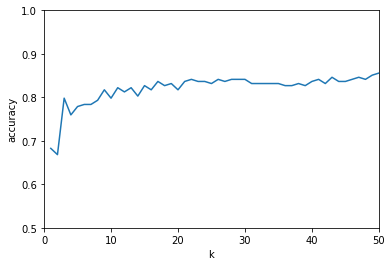

In [152]:
#Plot this out

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(KNN_accuracies["k"], KNN_accuracies["accuracy"])
plt.xlim(0,50)
plt.ylim(0.5,1)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? Hint: you'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [156]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train_NB = scaler.fit_transform(X_train)
X_test_NB = scaler.transform(X_test)


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_NB, y_train)
NB_output = NB_classifier.predict(X_test_NB)

NB_accuracy = accuracy_score(NB_output, y_test)

print(NB_accuracy)

0.8125


## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is. Do we have a new winner?

In [ ]:
#See above

## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [157]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_output = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(log_reg_output, y_test)

print(log_reg_accuracy)

0.8269230769230769


## Neural Networks

As a bonus challenge, let's see if an artificial neural network can do even better. You can use Keras to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary.

In [166]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

NN = Sequential()

NN.add(Dense(200, activation='relu', input_shape=(4,)))
NN.add(Dropout(0.5))
NN.add(Dense(1, activation='sigmoid'))

NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               1000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [170]:
#Compile it

NN.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [171]:
#Fit the NN
NN.fit(X_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=2,
                    validation_data=(X_test, y_test))

Train on 622 samples, validate on 208 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 0s - loss: 0.2229 - acc: 0.6479 - val_loss: 0.1875 - val_acc: 0.8269
Epoch 2/50
 - 0s - loss: 0.1866 - acc: 0.7556 - val_loss: 0.1653 - val_acc: 0.8269
Epoch 3/50
 - 0s - loss: 0.1757 - acc: 0.7830 - val_loss: 0.1503 - val_acc: 0.8462
Epoch 4/50
 - 0s - loss: 0.1677 - acc: 0.7781 - val_loss: 0.1409 - val_acc: 0.8462
Epoch 5/50
 - 0s - loss: 0.1602 - acc: 0.7814 - val_loss: 0.1355 - val_acc: 0.8413
Epoch 6/50
 - 0s - loss: 0.1592 - acc: 0.7814 - val_loss: 0.1320 - val_acc: 0.8413
Epoch 7/50
 - 0s - loss: 0.1549 - acc: 0.7781 - val_loss: 0.1281 - val_acc: 0.8413
Epoch 8/50
 - 0s - loss: 0.1565 - acc: 0.7830 - val_loss: 0.1256 - val_acc: 0.8413
Epoch 9/50
 - 0s - loss: 0.1553 - acc: 0.7942 - val_loss: 0.1245 - val_acc: 0.8413
Epoch 10/50
 - 0s - loss: 0.1539 - acc: 0.7814 - val_loss: 0.1246 - val_acc: 0.8413
Epoch 11/50
 - 0s - loss: 0.1549 - acc: 0.7749 - val_loss: 0.1237 - val_acc

In [182]:
NN_output = NN.predict(X_test)

#Fit the NN output

for x in range(len(NN_output)):
    if NN_output[x] >= 0.5:
        NN_output[x] = 1
    else:
        NN_output[x] = 0

In [185]:
#Evaluate accuracy

NN_accuracy = accuracy_score(NN_output, y_test)

print(NN_accuracy)

0.8509615384615384


## Do we have a winner?

Which model, and which choice of hyperparameters, performed the best? Feel free to share your results!